# Lab 3 - Matrix structure for discrete-time models
### Name: Robert Sucholeiki
### Lab section: Friday

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices -- this week including some linear algebra
import matplotlib.pyplot as plt #package with plotting capabilities

## Introduction

In this lab we will use tools from linear algebra to investigate higher dimensional difference equations.

The objectives for this assignment are:
 - Assign matrix variables
 - Propagate a population vector through time using matrix multiplication
 - Use slices and sums on arrays
 - Calculate eigenvalues and eigenvectors of a matrix
 - Interpret their meaning for the dynamics of population models

## Part 1: Fibonacci and the leading eigenvalue
 
The Fibonacci sequence is defined by the equation:
 
$$ N(t+1) = N(t) + N(t-1) $$
 
with the initial values $N(0)=1$ and $N(1)=1$. The Fibonacci sequence is 
ubiquitous in many areas of science. It describes the number of spirals 
on a sunflower as well as the recursive solution to the Towers of Hanoi 
problem (the game where you have to move rings between three pegs).

### Q1.1
Based on the recursive definition above, construct a for loop that iterates through 10 timesteps, given 2 initial values (for a total of 12 timesteps). Compute and plot the ratios of succesive generations N(i+1)/N(i). What value does the graph approach? What is the name of this value?  What prediction can you make about the long term dynamics of the system? 

<function matplotlib.pyplot.show(close=None, block=None)>

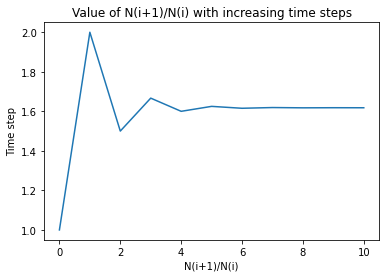

In [16]:
#First create a array of the first 12 values of the Fibonacci Sequence
numsteps = 10 #Set number of steps
N = np.zeros(numsteps + 2) #Create an array of values
N[0]=1 #Define first value
N[1]=1 #Define second value
for i in np.arange(numsteps): #For loop to propagate Fibonacci Sequence
    N[i+2] = N[i+1] + N[i]

#Now we create a new array R that contains the ratios of successive generations N(i+1)/N(i)
R = np.zeros(numsteps + 1)
for j in np.arange(numsteps + 1): #For loop to propagate Fibonacci Sequence
    R[j] = N[j+1]/N[j]

plt.plot(R)
plt.xlabel('N(i+1)/N(i)')
plt.ylabel('Time step')
plt.title('Value of N(i+1)/N(i) with increasing time steps')
plt.show

When we plot the value of N(i+1)/N(i) with increasing time steps, it converges to a stable value of about 1.618. This fraction approaches a number known as the "golden ratio", equal to [1 + sqrt(5)]/2. This is one of two eigenvalues that correspond to the 2 by 2 matrix for the Fibonacci model. 

Because this eigenvalue is larger than one, we know that the population does not converge to a constant size but instead continues growing larger and larger over time. 

### Q1.2
In class we saw that we could rewrite the second order Fibonacci difference equation as two coupled first order difference equations. Write a code that generates the first 12 terms of the Fibonacci sequence by using matrix multiplication inside the for loop, starting with  the initial population vector (1,1), representing juvenile and adult rabbit populations. Your code should produce an array of size 2 by 12 (a 2-row  column vector for each time). Print out this array, and check that you get the same result as in Chapter 5 of the textbook. Calculate the fraction of total population at each time which are juveniles (non-reproducing rabbits) and adults, and plot those fractions over time. How do they correspond to the calculations in Q1.1?

The 2 by 12 population array is for 10 time steps is:
[[  1.   2.   3.   5.   8.  13.  21.  34.  55.  89. 144. 233.]
 [  1.   1.   2.   3.   5.   8.  13.  21.  34.  55.  89. 144.]]


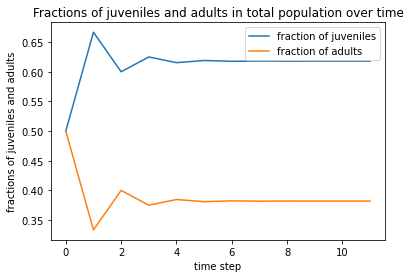

In [39]:
M=np.array([[1, 1], [1, 0]]) # define matrix representation of the Fibonacci model 

numsteps = 10 #define number of time steps

pop = np.zeros([2, numsteps+2]) #Create a population array of size 2 by 12
pop[:,0] = np.array([1,1]) #initialize the array with initial population vector [1,1]
for i in np.arange(numsteps + 1): #Propagate the Fibonacci model over the number of time steps
    pop[:,i+1] = M@pop[:,i] 

print('The 2 by 12 population array is for 10 time steps is:')
print(pop)
    
#Now make a for loop to calculate the fraction of juveniles at each time step
J = np.zeros(numsteps + 2) #Create juvenile fraction array
for j in np.arange(numsteps + 2): 
    J[j] = pop[0,j]/(pop[0,j]+pop[1,j])

#Now make a for loop to calculate the fraction of adults at each time step
A = np.zeros(numsteps + 2) #Create adult fraction array
for a in np.arange(numsteps + 2):
    A[a] = pop[1,a]/(pop[0,a]+pop[1,a])

plt.plot(J, label = 'fraction of juveniles')    
plt.plot(A, label = 'fraction of adults')
plt.xlabel('time step')
plt.ylabel('fractions of juveniles and adults')
plt.title('Fractions of juveniles and adults in total population over time')
plt.legend()
plt.show()

The fraction of juveniles out of the total population converges to a constant value about .618. The fraction of adults out of the total population converges to a value of about .382. The fraction of juveniles is equal to 1/(the golden raio) = 1/((1 + sqrt(5)) / 2). The is due to the special proporty of the golden ratio, it is equal to the ratio of the total population to the larger fraction (juveniles). So we have that golden ratio = 1/(fraction juveniles), so fraction juveniles = 1/golden ratio. The golden ratio is the positive eigenvalue that corresponds to the Fibonacci matrix established in the previous question. 

## Part 2: Leslie and Usher models

Recall that a Leslie matrix defines a discrete-time population growth model that is used in ecology. Each Leslie matrix has an associated variable vector that stores the present values of certain distinct groups (usually age groups).

Flour beetles live in and eat flour (surpise!). As with many insects, they go through distinct life stages of eggs, larvae, pupae, and adults. Let us simplify the situation and keep track only of the larvae and adults, with the following parameters: adults lay 80 eggs per individual and that 0.1 of the eggs hatch to become larvae, and that 0.12 of the larvae survive to become adults, and the adults reproduce and die. The reality is considerably messier, but we will ignore these effects in this assignment.

### Q2.1
Define the the Leslie matrix for the above stated situation. Start the population with 100 larvae and 10 adults and iterate the model for 100 steps using matrix multiplication and plot the  total population (including eggs for the purposes of this exercise) versus time (for each time step) on one figure. On a different figure, plot the two individual age group populations against time (for each time step).  Describe what happens over time. 

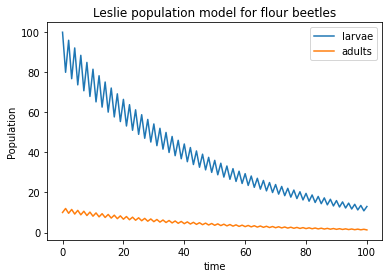

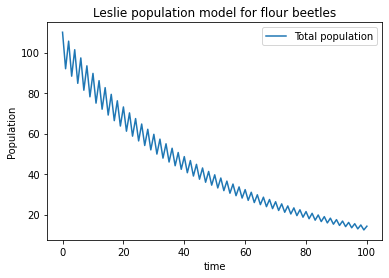

In [42]:
numsteps = 100 #Define number of time steps
#80 eggs per adult. .1 eggs become larvae. .12 larvae become adults. All adults die. 
#Therefore, .1(80) = 8 larva are born for each adult.
# We are instructed to keep track of only the larvae and adults
M=np.array([[0, 8], 
            [.12, 0]]) # define Leslie matrix
pop = np.zeros([2, numsteps+1]) #Let's define 2 by 101 population array
pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults
for i in np.arange(numsteps):
    pop[:,i+1] = M@pop[:,i] #propagate the population vector over the number of time steps

#Here, we plot the populations of larvae and adults separately
plt.plot(pop[0,:],label='larvae')
plt.plot(pop[1,:],label='adults') 
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model for flour beetles')
plt.legend()
plt.show()

#Next, let's make a plot of the total population
Total = np.zeros(numsteps + 1) #Create an array for the total population values
for j in np.arange(numsteps + 1): #Create a for loop to sum the larvae and adult populations at each time step
    Total[j] = pop[0, j] + pop[1, j]

plt.plot(Total, label = 'Total population')
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model for flour beetles')
plt.legend()
plt.show()
    


Over time, the population of flower beetles decays and approaches closer and closer to zero. This intuitively makes sense given what we know about the flour beetle population dymaics. This is because for every time step, there are 8 larvae born to adult flower beetles, but only .12 of existing larvae become adults. When we multiply these two values, we get 8(.12) = .96 < 1. Therefore, all adults die every time step and the new adults that replenish them are less than the adults that were there previously. The result is that the population decays over time toward zero. If we found the eigenvalues for our matrix, we would see that the largest eigenvalue would have a magnitude less than 1, consistent with this. The populations undergo oscillations which indicates that the two eigenvalues of our matrix both have a magnitude less than one, but their magnitue is the same and they are opposite in sign. This means that neither eigenvalue dominates the end behavior of the model over the other. 

### Q2.2

Now suppose that 0.25 of the adults survive to reproduce again (and potentially again and again!) 

We can now extend the previous Leslie matrix into an Usher matrix, which allows individuals to remain within the same age group from time step to time step. Define the Usher matrix and iterate the model, starting with the same initial population: 100 larvae and 10 adults. Plot the total population versus time on one figure. On a different figure, plot the individual age group populations against time. Describe what happens over time.

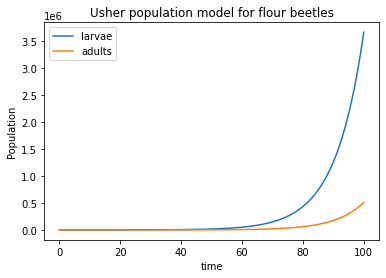

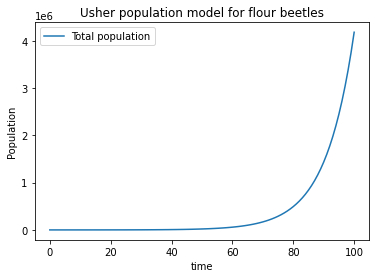

In [45]:
numsteps = 100 #Define number of time steps
#80 eggs per adult. .1 eggs become larvae. .12 larvae become adults.
#Therefore, .1(80) = 8 larva are born for each adult.
# What is new here is that .25 of the adults SURVIVE every generation
# We are instructed to keep track of only the larvae and adults
M=np.array([[0, 8], 
            [.12, .25]]) # define Usher matrix
pop = np.zeros([2, numsteps+1]) #Let's define 2 by 101 population array
pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults
for i in np.arange(numsteps):
    pop[:,i+1] = M@pop[:,i] #propagate the population vector over the number of time steps

#Here, we plot the populations of larvae and adults separately
plt.plot(pop[0,:],label='larvae')
plt.plot(pop[1,:],label='adults') 
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Usher population model for flour beetles')
plt.legend()
plt.show()

#Next, let's make a plot of the total population
Total = np.zeros(numsteps + 1) #Create an array for the total population values
for j in np.arange(numsteps + 1): #Create a for loop to sum the larvae and adult populations at each time step
    Total[j] = pop[0, j] + pop[1, j]

plt.plot(Total, label = 'Total population')
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Usher population model for flour beetles')
plt.legend()
plt.show()

Here, we see that both the population of adults and the population of larvae grow over time. The total population thus also grows over time and shows exponential growth. Notice now that the population does not oscillate over time. This demonstrates that the of the two eignvalues for this matrix model, one has a larger magnitude than the other and dominates the end behavior of the model. The larger eigenvalue is larger than 1, which enables growth at increasing time. 

### Q2.3
Investigate the age distributions in the flour beetle populations in each of the above models. Plot the population fraction in each stage (larvae and adults) by dividing each number by the total population at the time step. Do this for each model above and make a different figure for each model. Describe what happens to the age distributions over time.

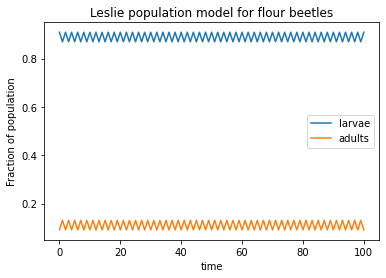

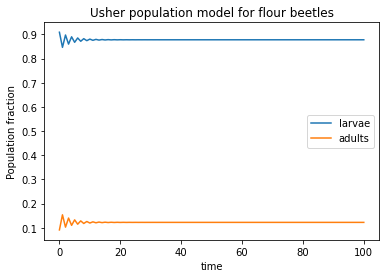

In [54]:
#1) LESLIE MODEL
numsteps = 100 #Define number of time steps
#80 eggs per adult. .1 eggs become larvae. .12 larvae become adults. All adults die. 
#Therefore, .1(80) = 8 larva are born for each adult.
# We are instructed to keep track of only the larvae and adults
M=np.array([[0, 8], 
            [.12, 0]]) # define Leslie matrix
pop = np.zeros([2, numsteps+1]) #Let's define 2 by 101 population array
pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults
for i in np.arange(numsteps):
    pop[:,i+1] = M@pop[:,i] #propagate the population vector over the number of time steps

#Now make a for loop to calculate the fraction of juveniles at each time step
J = np.zeros(numsteps + 1) #Create juvenile fraction array
for j in np.arange(numsteps + 1): 
    J[j] = pop[0,j]/(pop[0,j]+pop[1,j])

#Now make a for loop to calculate the fraction of adults at each time step
A = np.zeros(numsteps + 1) #Create adult fraction array
for a in np.arange(numsteps + 1):
    A[a] = pop[1,a]/(pop[0,a]+pop[1,a])
    
#Here, we plot the populations of larvae and adults separately
plt.plot(J,label='larvae')
plt.plot(A,label='adults') 
plt.xlabel('time')
plt.ylabel('Fraction of population')
plt.title('Leslie population model for flour beetles')
plt.legend()
plt.show()


#2) USHER MODEL
numsteps = 100 #Define number of time steps
#80 eggs per adult. .1 eggs become larvae. .12 larvae become adults.
#Therefore, .1(80) = 8 larva are born for each adult.
# What is new here is that .25 of the adults SURVIVE every generation
# We are instructed to keep track of only the larvae and adults
M=np.array([[0, 8], 
            [.12, .25]]) # define Usher matrix
pop = np.zeros([2, numsteps+1]) #Let's define 2 by 101 population array
pop[:,0] = np.array([100,10]) #initialize the array with 100 larvae and 10 adults
for i in np.arange(numsteps):
    pop[:,i+1] = M@pop[:,i] #propagate the population vector over the number of time steps

#Now make a for loop to calculate the fraction of juveniles at each time step
J = np.zeros(numsteps + 1) #Create juvenile fraction array
for j in np.arange(numsteps + 1): 
    J[j] = pop[0,j]/(pop[0,j]+pop[1,j])

#Now make a for loop to calculate the fraction of adults at each time step
A = np.zeros(numsteps + 1) #Create adult fraction array
for a in np.arange(numsteps + 1):
    A[a] = pop[1,a]/(pop[0,a]+pop[1,a])

#Here, we plot the populations of larvae and adults separately
plt.plot(J,label='larvae')
plt.plot(A,label='adults') 
plt.xlabel('time')
plt.ylabel('Population fraction')
plt.title('Usher population model for flour beetles')
plt.legend()
plt.show()

For the Leslie model, we see that the population fractions oscillate between two fractions over time for both the larvae (oscillations between 0.90909091 and 0.86956522) and adults (oscillations between 0.09090909 and 0.13043478). 

For the Usher model, we see that the population fractions converge to stable values over time for both the larvae (stable at about 0.87789209) and adults (stable at about 0.12210791)

## Part 3: Matrix analysis of age-structured populations

The special numbers called eigenvalues and the special vectors called eigenvectors describe the dynamics and the distribution of populations, respectively. Use the numpy function np.linalg.eig() to calculate them.

### Q3.1
Compute the eigenvalues and eigenvectors of the Leslie model in Q2.1. Use them to predict the dynamics of the models - what happens to the total population over the long term? Predict the long-term population distribution and compare it with the first figure you generated in Q2.3.

In [61]:
L=np.array([[0, 8], [.12, 0]]) # define Leslie matrix

eVals, eVecs = np.linalg.eig(L) # find eigenvalues and eigenvectors

print('Eigenvalues:'+str(eVals)) 
print('Eigenvectors:'+str(eVecs))
#We then use the eigenvector corresponding to the largest, positive eigenvalue
print('The long term fractions of larvae and adults are: ' + str(eVecs[:,0]/np.sum(eVecs[:,0])))

Eigenvalues:[ 0.9797959 -0.9797959]
Eigenvectors:[[ 0.99258333 -0.99258333]
 [ 0.12156613  0.12156613]]
The long term fractions of larvae and adults are: [0.89088885 0.10911115]


The long term fractions of larvae and adults are: 0.89088885 for larvae and 0.10911115 for adults as predicted form the eigenvectors. When we look at the Leslie models from the figure we generated in Q2.3, we see that the populations are modeled to oscillate between two values.These population fractions we calculate here are actually the averages of the oscillating values. For example, .891 for larvae is the approximate average of the fractions .909 and .870 that oscillated for larvae. Meanwhile, .109 is the approximate average of the fractions 0.0909 and 0.1304 that oscillated for adults. 

We see from the eigenvalues that both have a magnitude less than 1. The magnitudes of the eigenvalues are the same but they have opposite sign. This explain the oscillations in the model, because neither eignevalue can solely dominate the end behavior.

### Q3.2
Find the eigenvalues and eigenvector of the Usher model in Q2.2. Use them to predict the dynamics of the models - what happens to the total population over the long term? Predict the long-term population distribution and compare it with the second figure you generated in Q2.3.

In [62]:
U=np.array([[0, 8], [.12, .25]]) # define Usher matrix

eVals, eVecs = np.linalg.eig(U) # find eigenvalues and eigenvectors

print('Eigenvalues:'+str(eVals)) 
print('Eigenvectors:'+str(eVecs))
#We then use the eigenvector corresponding to the largest, positive eigenvalue
print('The long term fractions of larvae and adults are: ' + str(eVecs[:,1]/np.sum(eVecs[:,1]))) 

Eigenvalues:[-0.86273731  1.11273731]
Eigenvectors:[[-0.99423527 -0.99046482]
 [ 0.10722048 -0.1377659 ]]
The long term fractions of larvae and adults are: [0.87789209 0.12210791]


The long term fractions of larvae and adults are: 0.87789209 for larvae and 0.12210791 for adults as predicted from the eigenvectors. This is consistent with the stable values that we had seen in the Usher model in Part 2.3. We see that of our two eigenvalues, one has a larger magnitude than the other; the larger eigenvalue is > 1. This explains the growth of the model over time and the lack of oscillations, as one eigenvalue dominates the end behavior of the model. 

### Q 3.3
Calculate or find the special value of the adult survival rate $s$ in the Usher model at which the solutions neither decay to zero nor grow exponentially to infinity, in other words, that have a leading eigenvalue of 1. Calculate the eigenvalues and eigenvectors and predict the steady-state age distribution of this model.

In [65]:
#Here, we are looking for an Usher model with matrix of [[0, 8], [.12, s]]
#Let us define the trace of the matrix = t, and the determinant of the matrix = d
#If the leading eigenvalue = 1, then we have: 1 = [t +/- sqrt(t^2 - 4*d)] / 2
# t = 0 + s = s.
# d = (0)(s) - (.12)(8) = -.96
#We then solve for s: 1 = [s +/- sqrt(s^2 - 4*(-.96))] / 2
#We find that s = .04

U=np.array([[0, 8], [.12, .04]]) # define Usher matrix

eVals, eVecs = np.linalg.eig(U) # find eigenvalues and eigenvectors

print('Eigenvalues:'+str(eVals)) 
print('Eigenvectors:'+str(eVecs))
#We then use the eigenvector corresponding to the largest, positive eigenvalue (here, that eigenvalue = 1)
print('The long term fractions of larvae and adults are: ' + str(eVecs[:,1]/np.sum(eVecs[:,1]))) 


Eigenvalues:[-0.96  1.  ]
Eigenvectors:[[-0.99287684 -0.99227788]
 [ 0.11914522 -0.12403473]]
The long term fractions of larvae and adults are: [0.88888889 0.11111111]


Using the calculations described in the comments, we find that the adult survival rate s = .04. The Eigenvalues for this matrix are then -0.96 and 1. 1 is the larger eigenvalue in magnitude and dominates the end behavior of the model. For an eigenvalue of 1, the solution neither grows nor decays at increasing time; this confirms the premise of our question. The eigenvectors are also printed in the python output. The long term fractions of larvae and adults are 0.88888889 for larvae and 0.11111111 for adults. 